# K Mean Clustering Project

For this Project we will attempt to use KMeans Clustering to clustering to cluster into to two groups,Private and Public

#### It is very important to note,we actually have the labels for this data set,but we will NOT use them for the KMeans clustering algorithm,since that is an unsupervised learning algorithm

#### When usin g the Kmeans  algorithm undwer normal circumstances it is because you don't have label In this case we will use the labels to try to get an idea of how well the algorithm performed,but you won't usually do this for Kmeans so the classification report and confusion matrix at the end of this project,don't truly make sense in a real world setting

### Import model

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

# Get The Data


#### Read in the College_data file usin read_csv Figure out how to set the first columns as the index

In [7]:
df=pd.read_csv('Data.csv')

### check the head of the data

In [8]:
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#### Check the info() and describe methods on data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [10]:
df.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


# EDA

Its time to create some data visulization

#### Create a scatterplot of Grad.Rate versus Room.Board where the points are corelated by the Private column

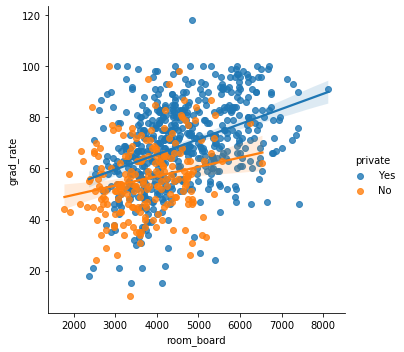

In [15]:
sns.lmplot(x='room_board',y='grad_rate',data=df,hue='private')

D:\Install folder\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


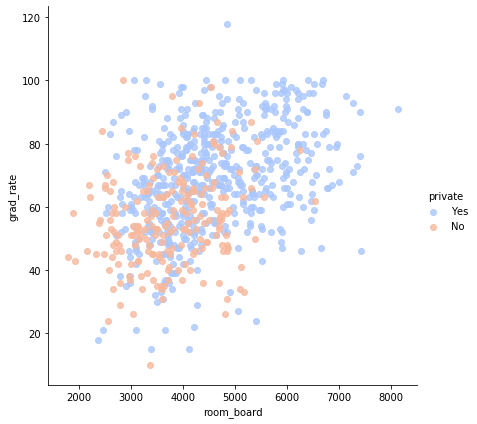

In [18]:
sns.lmplot(x='room_board',y='grad_rate',data=df,hue='private',fit_reg=False
          ,palette='coolwarm',size=6,aspect=1)
#lmplot linear model

#### Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private columns

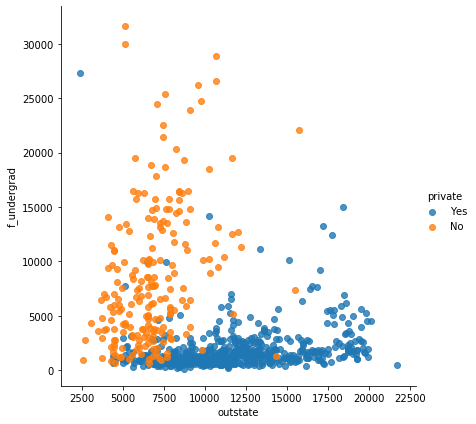

In [21]:
sns.lmplot(x='outstate',y='f_undergrad',data=df,hue='private',fit_reg=False,
          size=6,aspect=1)

#### Create a stacked histogram showing Out of state Tution based on the private columns Try doing this using sns.FaceGrids if that is too tricky ,see if you can do it just by using two instances of pandas plot(kind='his')

D:\Install folder\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


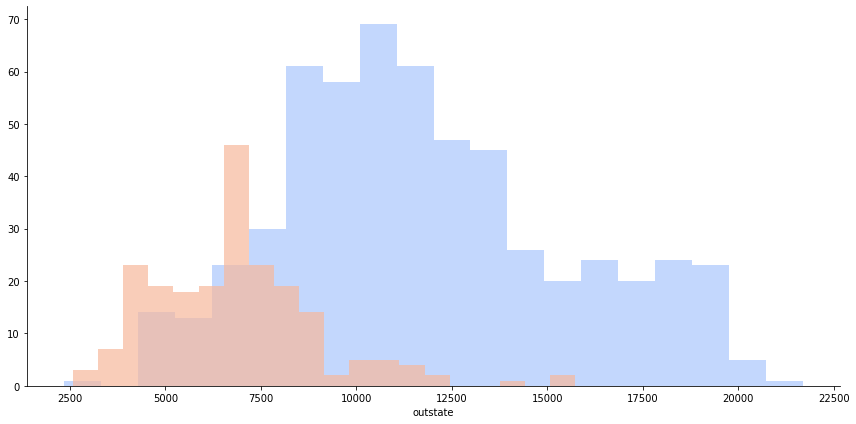

In [25]:
g=sns.FacetGrid(df,hue='private',palette='coolwarm',size=6,aspect=2)
g=g.map(plt.hist,'outstate',bins=20,alpha=0.7)

#### Create a similar histogram for the Grad.Rate column

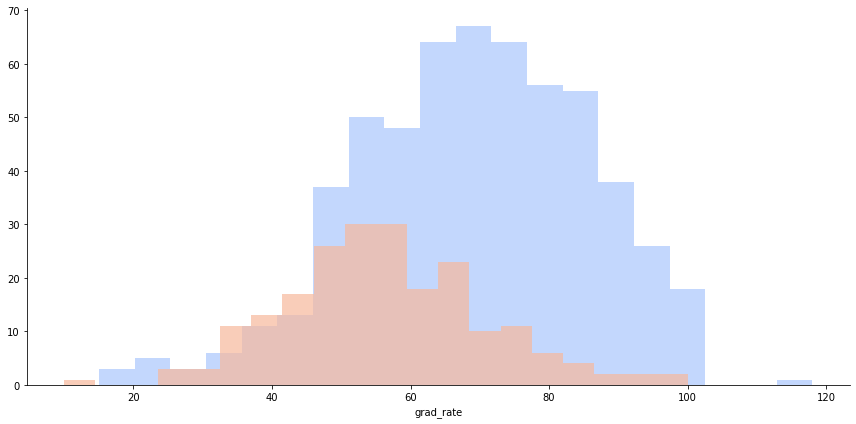

In [28]:
g=sns.FacetGrid(df,hue='private',palette='coolwarm',size=6,aspect=2)
g=g.map(plt.hist,'grad_rate',bins=20,alpha=0.7)

#### Notice How there seem to be a private school with a graduation rate of higher than 100% What is the name of school?

In [30]:
df[df['grad_rate']>100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


#### Set that school's Graduation rate to 100 so it make sense you may get a warning not an error() when doing this operation so use dataframe operations or just re do the histogram visulization to make sure it actually went through

In [31]:
df['grad_rate']['cazenovia college']=100

D:\Install folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# K Means Cluster creation

Now it is time to create the cluster labels!

#### import KMeans from Scikit Learn

In [32]:
from sklearn.cluster import KMeans

#### Create a instance of a K means model with 2 cluster

In [33]:
kmeans=KMeans(n_clusters=2)

#### Fit the model to all the data except for the Private label

In [35]:
kmeans.fit(df.drop('private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### What are the cluster center vectors?

In [38]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01]])

# Evaluation

#### There is no perfect way to evaluate clustering if you don't have the labels,however since this is just an excercise,we do have the labels so we take advantage of this to evaluate our clusters keep in mind you usually won't have this lixury in the real work

## Create anew column for df called 'Cluster' whis is a 1 for a private school,and a 0 for a public school

In [39]:
def converter(private):
    if private ==  'Yes':
        return 1
    else:
        return 0

In [40]:
df['Cluster']=df['private'].apply(converter)

In [41]:
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,Cluster
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


#### create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any label

In [42]:
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print('\n')
print(classification_report(df['Cluster'],kmeans.labels_))

[[ 74 138]
 [ 34 531]]


              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



Not so bad considering the algorithm is purely using the features to cluster the univercities into 2 distinct group! hopefully you can begin to see how K Means is useful for clustering un_labeled data